# Circuitos cuánticos

In [2]:
# Importación de bibliotecas estándar de Qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute

{'10': 1000}


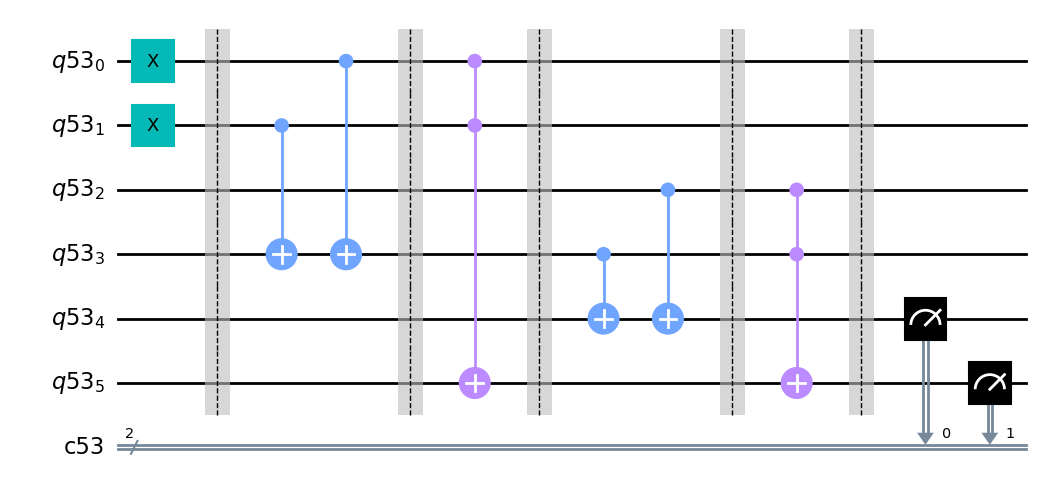

In [59]:
# Define los registros
q = QuantumRegister(6) # 8 qubits
c = ClassicalRegister(2) # 2 bits clásicos
qc = QuantumCircuit(q, c)
# Define la entrada
# X = 1
qc.x(q[0])
# A = 1
qc.x(q[1])
# B = 0

qc.barrier()

# Define el circuito cuántico
# S = X + A
qc.cx(q[1], q[3])
qc.cx(q[0], q[3])
qc.barrier()

# C = X + A
qc.ccx(q[0], q[1], q[5])
qc.barrier()

# S = (X + A) + B
qc.cx(q[3], q[4])
qc.cx(q[2], q[4])
qc.barrier()

# C = (X + A) + B
qc.ccx(q[2], q[3], q[5])
qc.barrier()

# Mide tu circuito, recuerda, se deben medir 2 qubits de salida
qc.measure(q[4], c[0])
qc.measure(q[5], c[1])

simulador = Aer.get_backend('aer_simulator')
job = simulador.run(qc, shots=1000)
result = job.result()
count = result.get_counts()
print(count)    
qc.draw(output='mpl')